## Gas Prices: Data Visualization

Visualizations of Data from many Sources

**Seaborn**

### Import and preprocess dataset

In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Dataset
raw_data = pd.read_csv('datasets/polttoneste_hinnat1988-2025.csv', skiprows=1, encoding='latin1')
raw_data

,Kuukausi,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
0,1988M01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1,1988M01,"Dieselöljy, snt/l",40.0,.
2,1988M01,"Kevyt polttoöljy, snt/l",16.0,.
3,1988M01,"Kevyt polttoöljy, eur/MWh",16.1,.
4,1988M02,"Moottoribensiini 95 E 10, snt/l",56.0,.
...,...,...,...,...
1783,2025M02,"Kevyt polttoöljy, eur/MWh",132.4,-11.4
1784,2025M03,"Moottoribensiini 95 E 10, snt/l",179.0,-6.8
1785,2025M03,"Dieselöljy, snt/l",179.0,-7.7
1786,2025M03,"Kevyt polttoöljy, snt/l",126.0,-12.5


In [3]:
# data preprocessing
dates = pd.to_datetime(raw_data['Kuukausi'], format="%YM%m")

# set index refactored dates
raw_data = raw_data.set_index(dates) 

# remove old column
raw_data = raw_data.drop(columns=['Kuukausi']) 

raw_data['Hinta'] = pd.to_numeric(raw_data['Hinta'], errors='coerce') # Set hinta column as numeric

raw_data 

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-01-01,"Dieselöljy, snt/l",40.0,.
1988-01-01,"Kevyt polttoöljy, snt/l",16.0,.
1988-01-01,"Kevyt polttoöljy, eur/MWh",16.1,.
1988-02-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
...,...,...,...
2025-02-01,"Kevyt polttoöljy, eur/MWh",132.4,-11.4
2025-03-01,"Moottoribensiini 95 E 10, snt/l",179.0,-6.8
2025-03-01,"Dieselöljy, snt/l",179.0,-7.7


In [4]:
# filter gasoline data
gas_price_data = raw_data[~raw_data['Polttoneste'].isin(['Kevyt polttoöljy, snt/l', 'Kevyt polttoöljy, eur/MWh', 'Dieselöljy, snt/l'])]
gas_price_data

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-02-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-03-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-04-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-05-01,"Moottoribensiini 95 E 10, snt/l",56.3,.
...,...,...,...
2024-11-01,"Moottoribensiini 95 E 10, snt/l",175.0,-10.3
2024-12-01,"Moottoribensiini 95 E 10, snt/l",176.0,-5.9
2025-01-01,"Moottoribensiini 95 E 10, snt/l",179.0,1.7


In [5]:
diesel_price_data = raw_data[~raw_data['Polttoneste'].isin(['Kevyt polttoöljy, snt/l', 'Kevyt polttoöljy, eur/MWh', 'Moottoribensiini 95 E 10, snt/l'])]
diesel_price_data

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01-01,"Dieselöljy, snt/l",40.0,.
1988-02-01,"Dieselöljy, snt/l",40.0,.
1988-03-01,"Dieselöljy, snt/l",40.0,.
1988-04-01,"Dieselöljy, snt/l",39.7,.
1988-05-01,"Dieselöljy, snt/l",39.9,.
...,...,...,...
2024-11-01,"Dieselöljy, snt/l",172.0,-15.3
2024-12-01,"Dieselöljy, snt/l",177.0,-10.2
2025-01-01,"Dieselöljy, snt/l",180.0,-1.6


Set index and remove unwanted columns

### Visualization / plotting

In [6]:
# copy df with resetted index (not used right now)
raw_gas_price_data = gas_price_data.reset_index() 

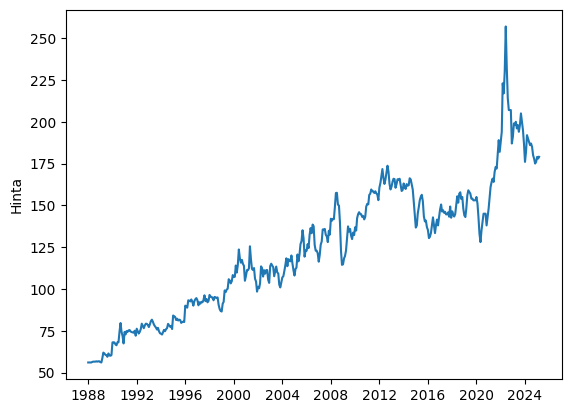

In [7]:
sns.lineplot(x=gas_price_data.index.values, y="Hinta", data=gas_price_data)
plt.show()

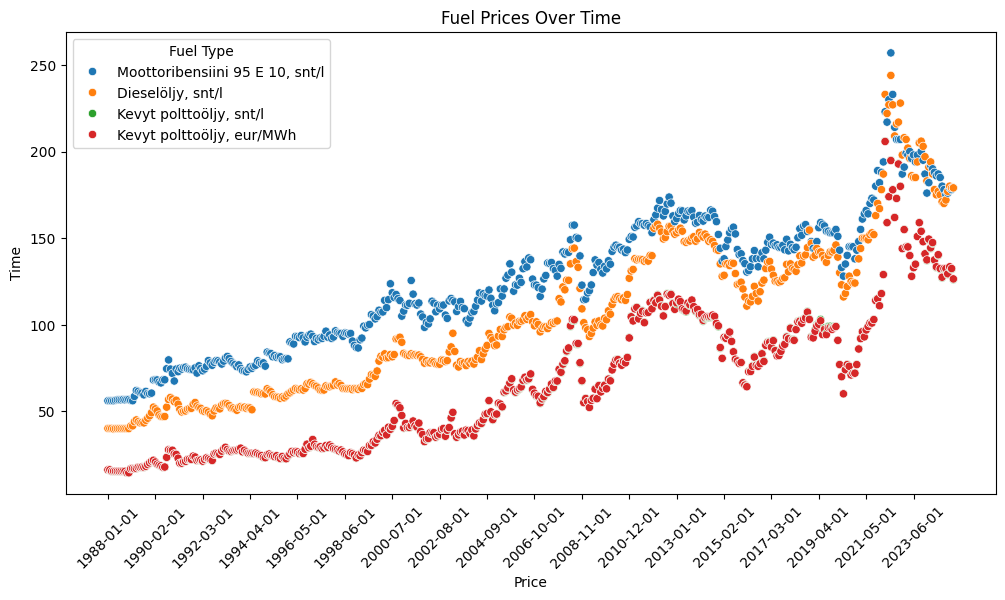

In [8]:
# Scatter plot
plt.figure(figsize=(12, 6))  # width=12 inches, height=6 inches
# plot
sns.scatterplot(
    x=raw_data.index.values, 
    y='Hinta', 
    hue='Polttoneste',  # different colors for each fuel
    data=raw_data
)
# Show only every 10th tick on y-axis
ticks = raw_data.index[::100]
plt.xticks(ticks, rotation=45)  # rotate 45 degrees
# labels and show plot
plt.xlabel("Price")
plt.ylabel("Time")
plt.title("Fuel Prices Over Time")
plt.legend(title='Fuel Type')
plt.show()